In [216]:
import pandas as pd
import numpy as np
import os

In [217]:
l_arch = os.listdir('programas/data/wb')

In [218]:
l_df = []
for a in l_arch:
    l_df.append(pd.read_csv(os.path.join('programas','data','wb',a)))

In [219]:
df = pd.concat(l_df,ignore_index=True)

In [220]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [221]:
l = list(df['Indicator Code'].value_counts().index)

In [222]:
l_anios = [x for x in df.columns][4:]

In [223]:
l_base = [x for x in df.columns if x not in l_anios]

In [224]:
l_df = []
for a in l_anios:
    aux = df[l_base+[a]].rename(columns={a:'valor'})
    aux['year'] = a 
    l_df.append(aux)

In [225]:
df = pd.concat(l_df,ignore_index=True)

In [226]:
df.shape

(45144, 6)

In [227]:
df = df.pivot_table(index=['Country Name', 'Country Code','year'],
               columns='Indicator Code',
               aggfunc='max',
               values='valor').reset_index()

In [228]:
df['Country Name'].value_counts()

Gibraltar                         57
New Zealand                       57
China                             57
Canada                            57
Bosnia and Herzegovina            57
                                  ..
High income                       57
St. Vincent and the Grenadines    57
Serbia                            30
West Bank and Gaza                27
Sint Maarten (Dutch part)         20
Name: Country Name, Length: 263, dtype: int64

In [229]:
for p in list(df['Country Name'].unique()):
    print('"%s",'%p)

"Afghanistan",
"Albania",
"Algeria",
"American Samoa",
"Andorra",
"Angola",
"Antigua and Barbuda",
"Arab World",
"Argentina",
"Armenia",
"Aruba",
"Australia",
"Austria",
"Azerbaijan",
"Bahamas, The",
"Bahrain",
"Bangladesh",
"Barbados",
"Belarus",
"Belgium",
"Belize",
"Benin",
"Bermuda",
"Bhutan",
"Bolivia",
"Bosnia and Herzegovina",
"Botswana",
"Brazil",
"British Virgin Islands",
"Brunei Darussalam",
"Bulgaria",
"Burkina Faso",
"Burundi",
"Cabo Verde",
"Cambodia",
"Cameroon",
"Canada",
"Caribbean small states",
"Cayman Islands",
"Central African Republic",
"Central Europe and the Baltics",
"Chad",
"Channel Islands",
"Chile",
"China",
"Colombia",
"Comoros",
"Congo, Dem. Rep.",
"Congo, Rep.",
"Costa Rica",
"Cote d'Ivoire",
"Croatia",
"Cuba",
"Curacao",
"Cyprus",
"Czech Republic",
"Denmark",
"Djibouti",
"Dominica",
"Dominican Republic",
"Early-demographic dividend",
"East Asia & Pacific",
"East Asia & Pacific (IDA & IBRD countries)",
"East Asia & Pacific (excluding high income)",
"Ecuado

In [230]:
l_fuera = ['Central Europe and the Baltics','Early-demographic dividend',
'East Asia & Pacific','East Asia & Pacific (IDA & IBRD countries)',
'East Asia & Pacific (excluding high income)',
'Europe & Central Asia',
'Europe & Central Asia (IDA & IBRD countries)',
'Europe & Central Asia (excluding high income)',
'European Union','Euro area','Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)','High income',
 'IBRD only',"Small states","South Asia",
"South Asia (IDA & IBRD)","Upper middle income",
'IDA & IBRD total',"Sub-Saharan Africa",
"Sub-Saharan Africa (IDA & IBRD countries)",
"Sub-Saharan Africa (excluding high income)",
'IDA blend',"West Bank and Gaza",
'IDA only',
'IDA total',"World",
 'Late-demographic dividend',
'Latin America & Caribbean',
'Latin America & Caribbean (excluding high income)',
'Latin America & the Caribbean (IDA & IBRD countries)',
'Least developed countries: UN classification',
 "Low & middle income",
"Low income",
"Lower middle income",
 "Middle East & North Africa",
"Middle East & North Africa (IDA & IBRD countries)",
"Middle East & North Africa (excluding high income)",
"Middle income","North America","OECD members","Other small states",
"Pacific island small states","Post-demographic dividend",
"Pre-demographic dividend",
]

In [231]:
df = df.loc[~df['Country Name'].isin(l_fuera)].reset_index(drop=True)

In [232]:
df.shape

(12362, 6)

In [233]:
df['Country Name'].value_counts()

Gibraltar                    57
Puerto Rico                  57
Canada                       57
Bosnia and Herzegovina       57
Cameroon                     57
                             ..
Philippines                  57
Nigeria                      57
Botswana                     57
Serbia                       30
Sint Maarten (Dutch part)    20
Name: Country Name, Length: 218, dtype: int64

In [234]:
df.reset_index(drop=True,inplace=True)

In [235]:
df['year'] = df['year'].astype(int)

In [236]:
l

['SP.DYN.LE00.IN', 'SP.DYN.TFRT.IN', 'SP.POP.TOTL']

In [237]:
ind = 'SP.POP.TOTL'

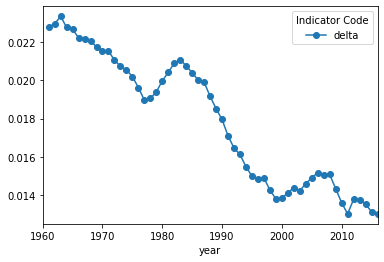

In [238]:
aux = df[['Country Code',ind,'year']].copy()

aux['year']+=1

aux = df.merge(aux,on=['Country Code','year'],how='left')

aux['delta'] = (aux['%s_x'%ind]-aux['%s_y'%ind])/aux['%s_x'%ind]

aux.head()

aux[['year','delta']][aux.year>=1960].groupby('year').mean().plot(marker='o')

In [240]:
t_des = 5
t_obs = 10

In [242]:
fhi=1960
fhf=2016
d = fhf-fhi +1

In [248]:
df.head()

Indicator Code,Country Name,Country Code,year,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.TOTL
0,Afghanistan,AFG,1960,32.292,7.45,8996351.0
1,Afghanistan,AFG,1961,32.742,7.45,9166764.0
2,Afghanistan,AFG,1962,33.185,7.45,9345868.0
3,Afghanistan,AFG,1963,33.624,7.45,9533954.0
4,Afghanistan,AFG,1964,34.060,7.45,9731361.0


In [279]:
aux = df[['Country Code','year']].copy()
for k in range(t_obs):
    #hacia atrás
    t = df[['Country Code','year']+l].copy()
    t['y0'] = t['year']+k
    t.drop('year',axis=1,inplace=True)
    aux = aux.merge(t,left_on=['Country Code','year'],right_on=['Country Code','y0'],how='left')
    aux.rename(columns=dict(zip(l,['%s_%d'%(v,k+1) for v in l])),inplace=True)
    aux.drop('y0',axis=1,inplace=True)
#hacia adelante
t = df[['Country Code','year','SP.DYN.LE00.IN']].copy()
t['y0'] = t['year']-t_des
t.drop('year',axis=1,inplace=True)
aux = aux.merge(t,left_on=['Country Code','year'],right_on=['Country Code','y0'],how='left')
aux.rename(columns={'SP.DYN.LE00.IN':'target'},inplace=True)
aux.drop('y0',axis=1,inplace=True)

In [282]:
for v in l:
    for k in range(2,12,2):
        aux['x_mean_%s_%d'%(v,k)] = aux[['%s_%d'%(v,i) for i in range(1,k+1)]].mean(axis=1)
        aux['x_median_%s_%d'%(v,k)] = aux[['%s_%d'%(v,i) for i in range(1,k+1)]].median(axis=1)
        aux['x_std_%s_%d'%(v,k)] = aux[['%s_%d'%(v,i) for i in range(1,k+1)]].std(axis=1)

/home/jose/Documentos/unam/repos/amv_2020_2/lib64/python3.6/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


In [283]:
aux.tail(10)

Indicator Code,Country Code,year,SP.DYN.LE00.IN_1,SP.DYN.TFRT.IN_1,SP.POP.TOTL_1,SP.DYN.LE00.IN_2,SP.DYN.TFRT.IN_2,SP.POP.TOTL_2,SP.DYN.LE00.IN_3,SP.DYN.TFRT.IN_3,...,x_median_SP.POP.TOTL_2,x_std_SP.POP.TOTL_2,x_median_SP.POP.TOTL_4,x_std_SP.POP.TOTL_4,x_median_SP.POP.TOTL_6,x_std_SP.POP.TOTL_6,x_median_SP.POP.TOTL_8,x_std_SP.POP.TOTL_8,x_median_SP.POP.TOTL_10,x_std_SP.POP.TOTL_10
12352,ZWE,2007,47.719,4.001,13329909.0,46.344,3.991,13124267.0,45.282,3.985,...,13227088.0,145410.852697,13032149.5,238053.143909,12858771.5,310047.216394,12705704.0,380491.312064,12567211.0,465137.716612
12353,ZWE,2008,49.337,4.014,13558469.0,47.719,4.001,13329909.0,46.344,3.991,...,13444189.0,161616.325908,13227088.0,266375.458062,13032149.5,346758.071595,12858771.5,414135.498454,12705704.0,487425.897571
12354,ZWE,2009,51.122,4.024,13810599.0,49.337,4.014,13558469.0,47.719,4.001,...,13684534.0,178282.832741,13444189.0,295626.976356,13227088.0,387470.605659,13032149.5,458702.579877,12858771.5,525173.018778
12355,ZWE,2010,52.975,4.028,14086317.0,51.122,4.024,13810599.0,49.337,4.014,...,13948458.0,194962.067495,13684534.0,325789.947115,13444189.0,429780.875851,13227088.0,510103.414631,13032149.5,575857.575879
12356,ZWE,2011,54.800,4.019,14386649.0,52.975,4.028,14086317.0,51.122,4.024,...,14236483.0,212366.793807,13948458.0,356619.368591,13684534.0,473261.860849,13444189.0,565109.539955,13227088.0,636101.344768
12357,ZWE,2012,56.516,3.996,14710826.0,54.800,4.019,14386649.0,52.975,4.028,...,14548737.5,229227.755005,14236483.0,387681.591665,13948458.0,517643.790481,13684534.0,621713.095377,13444189.0,702285.846583
12358,ZWE,2013,58.053,3.957,15054506.0,56.516,3.996,14710826.0,54.800,4.019,...,14882666.0,243018.458558,14548737.5,417017.224185,14236483.0,561145.738605,13948458.0,678283.942978,13684534.0,770693.940604
12359,ZWE,2014,59.360,3.903,15411675.0,58.053,3.957,15054506.0,56.516,3.996,...,15233090.5,252556.621930,14882666.0,441463.188180,14548737.5,601161.741391,14236483.0,732625.360688,13948458.0,838002.795765
12360,ZWE,2015,60.398,3.836,15777451.0,59.360,3.903,15411675.0,58.053,3.957,...,15594563.0,258642.689995,15233090.5,459257.135999,14882666.0,635118.004321,14548737.5,782066.252905,14236483.0,901630.085317
12361,ZWE,2016,61.163,3.760,16150362.0,60.398,3.836,15777451.0,59.360,3.903,...,15963906.5,263687.896879,15594563.0,471666.612520,15233090.5,661707.551706,14882666.0,824860.447015,14548737.5,959773.619680


In [268]:
aux.shape

(12362, 42)